In [5]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision.transforms as T
from torchvision.io import read_image

In [20]:
# It is tensor already
cat = read_image('./cat.jpg')

tensor([[[255, 254, 254,  ..., 250, 250, 250],
         [254, 254, 253,  ..., 250, 250, 249],
         [253, 253, 253,  ..., 249, 249, 249],
         ...,
         [235, 235, 236,  ..., 241, 241, 241],
         [235, 235, 236,  ..., 241, 241, 241],
         [235, 235, 236,  ..., 241, 241, 241]],

        [[218, 217, 217,  ..., 221, 221, 221],
         [217, 217, 216,  ..., 221, 221, 220],
         [216, 216, 216,  ..., 220, 220, 220],
         ...,
         [171, 171, 172,  ..., 228, 228, 228],
         [171, 171, 172,  ..., 228, 228, 228],
         [171, 171, 172,  ..., 228, 228, 228]],

        [[212, 211, 211,  ..., 223, 223, 223],
         [211, 211, 210,  ..., 223, 223, 222],
         [210, 210, 210,  ..., 222, 222, 222],
         ...,
         [171, 171, 172,  ..., 235, 235, 235],
         [171, 172, 173,  ..., 235, 235, 235],
         [172, 172, 173,  ..., 235, 235, 235]]], dtype=torch.uint8)

In [7]:
def show(imgs):
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = T.ToPILImage()(img.to('cpu'))
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

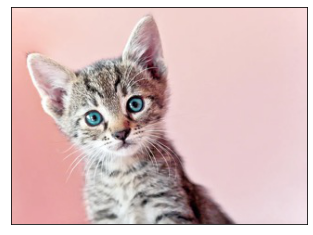

In [38]:
show([cat])

In [21]:
from torchvision.models import resnet18

In [22]:
resnet18 = resnet18(pretrained=True, progress=False).eval()

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/alanchuang/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


In [25]:
resnet18(cat.float().unsqueeze(0))

tensor([[-1.7180e+00,  3.9785e+01, -4.3282e+01, -4.3337e+01, -7.0297e+01,
         -7.4568e+00, -1.5904e+02,  1.2556e+01,  6.7288e+01, -1.4320e+02,
         -1.4264e+02, -2.7611e+01, -6.4929e+01, -1.0485e+02, -2.2815e+02,
         -1.5915e+02, -1.5382e+02, -2.4013e+02, -1.1754e+02, -2.5417e+02,
         -2.5975e+02, -1.1161e+02, -1.8861e+02, -5.8227e+01, -1.5967e+02,
         -8.7141e+01, -1.5323e+02, -1.8110e+02, -9.4236e+01, -1.1598e+02,
         -1.2215e+02, -1.0042e+02, -1.3634e+02, -1.1771e+02, -7.7021e+01,
         -9.8348e+01, -5.1033e+01, -9.1142e+01, -7.7850e+00, -1.0863e+02,
         -1.1663e+02, -1.8557e+02, -1.1906e+02, -5.7169e+01, -1.9426e+01,
         -1.1573e+01, -9.5208e+01, -7.7641e+01, -1.4442e+02, -2.1540e+02,
         -5.3281e+01, -2.1282e+01, -8.1895e+01, -1.1180e+02, -5.2164e+01,
         -1.5059e+02, -4.8280e+00, -1.6197e+02, -1.3795e+02, -1.1887e+02,
          2.7928e+01, -5.0531e+01, -6.2705e+01, -4.3882e+01, -5.8498e+01,
         -9.5317e+01, -4.0466e+01, -7.

In [44]:
from vivit import ViViT

print(cat.unsqueeze(0).unsqueeze(0).shape)

torch.Size([1, 1, 3, 235, 320])


In [49]:
# image_size, patch_size, num_classes, num_frames
model = ViViT(320, 5, 100, 1)
parameters = filter(lambda p: p.requires_grad, model.parameters())
parameters = sum([np.prod(p.size()) for p in parameters]) / 1_000_000
print('Trainable Parameters: %.3fM' % parameters)

print(cat.float().unsqueeze(0).unsqueeze(0).shape)
out = model(cat.float().unsqueeze(0).unsqueeze(0))

print("Shape of out :", out.shape)

Trainable Parameters: 4.376M
torch.Size([1, 1, 3, 235, 320])
Shape of out : torch.Size([1, 100])


In [50]:
print(out)

tensor([[ 7.7011e-01,  3.4821e-01,  5.5343e-01,  9.2895e-01,  7.8678e-01,
          6.7251e-01,  5.5440e-01, -1.9634e-01,  3.5914e-01,  8.2905e-01,
          2.7236e-01,  9.0558e-01, -9.0791e-01, -6.6276e-02, -4.1970e-01,
          2.7459e-01,  3.4109e-01,  3.1168e-02,  4.4152e-01, -8.8524e-01,
         -5.8581e-01,  4.8839e-01, -1.3416e-03,  4.1264e-01,  1.4150e+00,
          3.3694e-01,  1.0229e+00,  2.3989e-01,  5.8043e-01,  2.6540e-01,
          5.9080e-01, -1.4889e-01, -2.9410e-01,  8.7723e-01, -3.7234e-01,
         -4.7034e-01, -5.5722e-01,  2.3617e-02,  1.5223e-01, -3.1031e-01,
         -7.8732e-01,  5.9964e-01, -1.7267e-01,  8.3060e-01,  4.0430e-01,
          1.1435e+00,  4.4757e-01, -1.0635e-01,  4.9561e-01,  4.1492e-02,
         -6.1402e-01,  1.2845e+00, -1.3482e-01,  2.4795e-01, -5.3962e-01,
         -7.1655e-01, -2.1250e-01,  3.8189e-02,  8.6288e-01,  1.5800e-02,
         -2.9356e-01, -3.9950e-01, -2.8777e-01,  5.4272e-01,  9.3849e-02,
          7.1678e-01,  1.6332e-01, -2.